In [61]:
from __future__ import print_function, division

import numpy as np
import pandas as pd

import statsmodels.api as sm
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set()

In [62]:
# Wczytanie danych z pliku csv
df = pd.read_csv("LoanData.csv")
# Sprawdzenie wielkości danych
print(f"Wierszy: {df.shape[0]}\nKolumn: {df.shape[1]}")

C:\Users\modze\AppData\Local\Temp\ipykernel_2592\1343191915.py:2: DtypeWarning: Columns (12,34,38,67,80,82,83,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("LoanData.csv")


Wierszy: 290343
Kolumn: 112


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290343 entries, 0 to 290342
Columns: 112 entries, ReportAsOfEOD to ActiveLateLastPaymentCategory
dtypes: bool(3), float64(63), int64(11), object(35)
memory usage: 242.3+ MB


In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LoanNumber,290343.0,1.857382e+06,971563.294130,37.0,969601.5,2014461.00,2606097.500,3603512.00
BidsPortfolioManager,290343.0,5.246259e+02,1035.875281,0.0,38.0,139.00,494.000,10625.00
BidsApi,290343.0,1.744748e+01,116.719454,0.0,0.0,0.00,2.000,7570.00
BidsManual,290343.0,3.917444e+02,746.045047,0.0,22.0,106.00,389.000,12971.00
ApplicationSignedHour,290343.0,1.334073e+01,4.986498,0.0,10.0,13.00,17.000,23.00
...,...,...,...,...,...,...,...,...
PreviousEarlyRepaymentsCountBeforeLoan,290331.0,4.832071e-02,0.302239,0.0,0.0,0.00,0.000,13.00
NextPaymentNr,161135.0,4.676439e+00,8.116658,0.0,0.0,1.00,5.000,60.00
NrOfScheduledPayments,161135.0,7.119402e+01,31.848159,1.0,57.0,60.00,111.000,144.00
PrincipalDebtServicingCost,98226.0,1.298639e+01,90.216592,0.0,0.0,0.00,0.000,3325.33


,Missing Values,Missing Values %
DateOfBirth,290343,100.00
County,290343,100.00
City,290343,100.00
EmploymentPosition,290343,100.00
EL_V0,285774,98.43
...,...,...
PartyId,0,0.00
LoanApplicationStartedDate,0,0.00
ApplicationSignedWeekday,0,0.00
ApplicationSignedHour,0,0.00


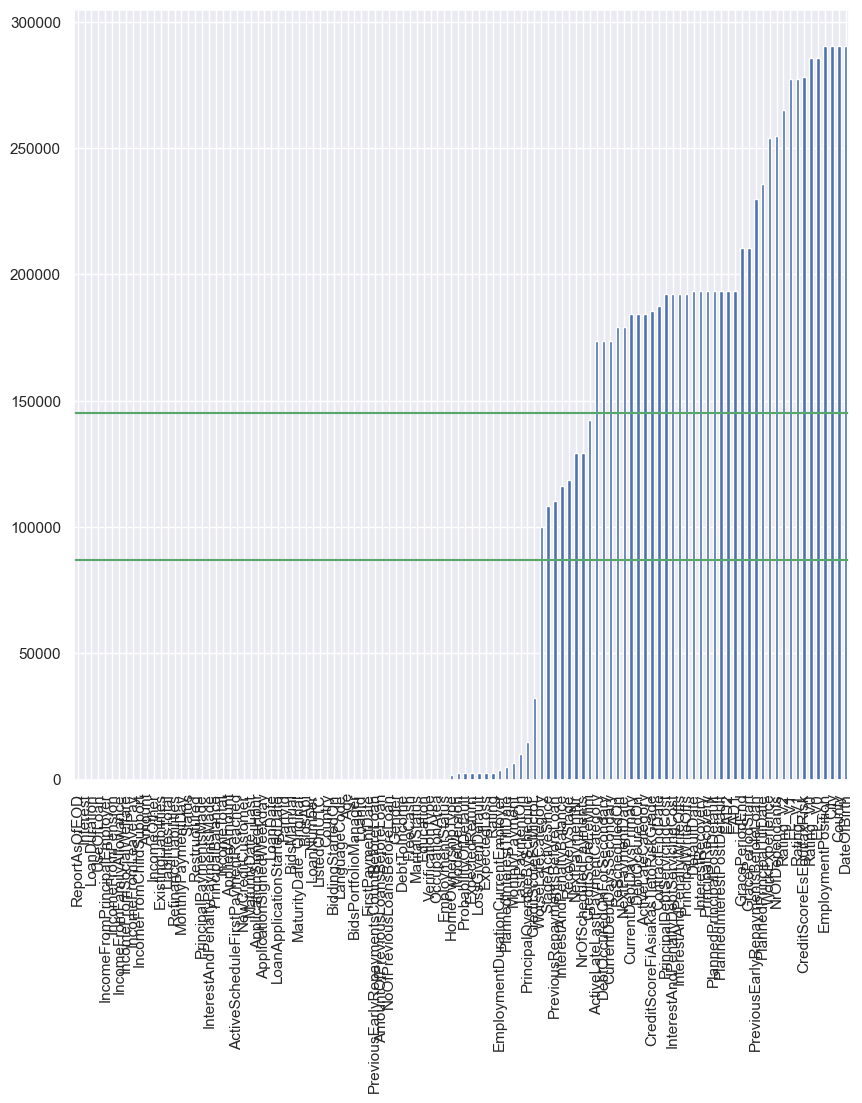

In [65]:

na_half = df.shape[0] * 0.5
na_thirty = df.shape[0] * 0.3

na_table = df.isnull().sum().sort_values()
na_plot = na_table.plot(kind="bar", figsize=(10, 10))
na_plot.axhline(na_half, c='g')
na_plot.axhline(na_thirty, c='g')

na_table = pd.DataFrame(data=na_table, columns=["Missing Values"])
na_table["Missing Values %"] = round(na_table["Missing Values"] / df.shape[0] * 100, 2)
na_table.sort_values(by=["Missing Values %"], ascending=False)

In [66]:
# Usunięcie tabel z df, gdzie ilość braków jest większa niż 30%
df = df[na_table[na_table["Missing Values %"] < 30].index.tolist()]

In [67]:
# Sortowanie danych po najmniejszej ilości braków
df = df.sample(10000)

In [68]:
df = df.sample(10000)

In [69]:
df.to_csv("cut_data.csv")

In [70]:
df.describe()

,Interest,LoanDuration,UseOfLoan,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,Amount,...,EmploymentStatus,HomeOwnershipType,ModelVersion,ProbabilityOfDefault,ExpectedReturn,LossGivenDefault,ExpectedLoss,PlannedInterestTillDate,MonthlyPayment,PrincipalOverdueBySchedule
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,9991.000000,9936.000000,9906.000000,9906.000000,9906.000000,9906.000000,9906.000000,9823.000000,9767.000000,9456.000000
mean,29.720908,49.737000,-0.369600,201.346700,8.661900,2.881018,1.350700,1.784300,1.197600,2622.341939,...,-0.464418,3.208837,5.527660,0.187932,0.114673,0.519662,0.115533,1134.453706,104.344043,325.380785
std,20.914046,17.372185,2.173308,943.479005,102.799349,26.889469,22.234139,39.629353,22.076012,2078.587433,...,1.439925,2.836807,8.099688,0.131215,0.060524,0.300441,0.093405,1631.419863,96.651541,891.830915
min,7.300000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.955800,...,-1.000000,0.000000,0.000000,0.000000,-0.585105,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.170000,36.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,830.000000,...,-1.000000,1.000000,5.000000,0.093940,0.086500,0.429112,0.062856,44.045000,35.805000,0.000000
50%,21.850000,60.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2126.000000,...,-1.000000,2.000000,6.000000,0.134286,0.109254,0.638705,0.090000,518.000000,91.250000,0.000000
75%,35.640000,60.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4146.000000,...,-1.000000,3.000000,6.000000,0.253859,0.138061,0.751400,0.143062,1590.000000,130.105000,108.115000
max,254.460000,120.000000,104.000000,16500.000000,2888.000000,1083.000000,867.000000,1795.000000,1131.000000,10632.000000,...,6.000000,10.000000,99.000000,0.976096,0.574105,0.992615,0.885105,10632.000000,1417.820000,10630.000000
